<a href="https://colab.research.google.com/github/Ananya-1233/Causal-Inference/blob/main/Causal_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
#Read the data and visualize

df = pd.read_csv('/content/hotel_bookings.csv')
print(df.shape)
df.head()

(119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The main aim of the project is to predict the likeliness of booking cancellations in a hotel management system.

We start by visualizing the value counts of cancellation status.

Text(0.5, 1.0, 'Count plot of cancellation status')

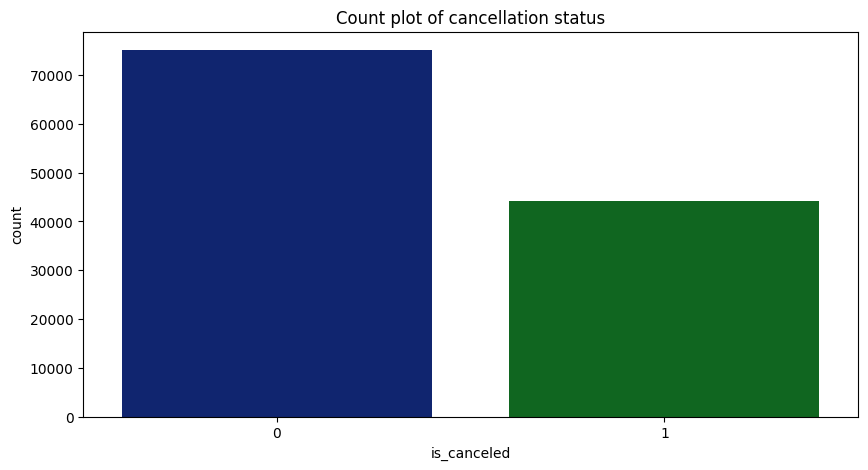

In [6]:
plt.figure(facecolor = 'w' , figsize=(10,5))

plt.style.use('seaborn-dark-palette')

sns.countplot(x = df['is_canceled'] , data=df)
plt.title('Count plot of cancellation status')

Text(0, 0.5, 'Bookings')

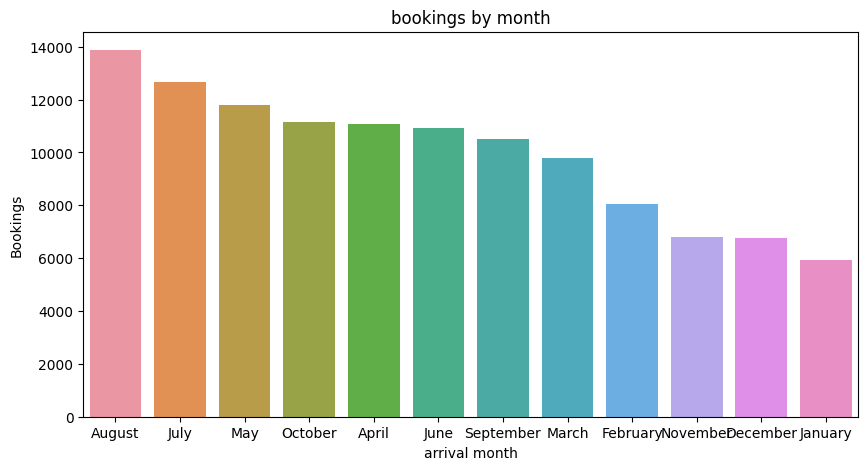

In [7]:
#Comparison of bookings over various months

plt.figure(figsize = (10,5))

plt.style.use('seaborn-dark-palette')

sns.countplot(data = df,
              x = df['arrival_date_month'],
              order = pd.value_counts(df['arrival_date_month']).index)
plt.title('bookings by month')
plt.xlabel('arrival month')
plt.ylabel('Bookings')

In [8]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
df.fillna(0, inplace = True)

In [11]:
#Replace values where ages are 'zero'

not_real = (df.children == 0) & (df.adults == 0) & (df.babies == 0)

df = df[~not_real]

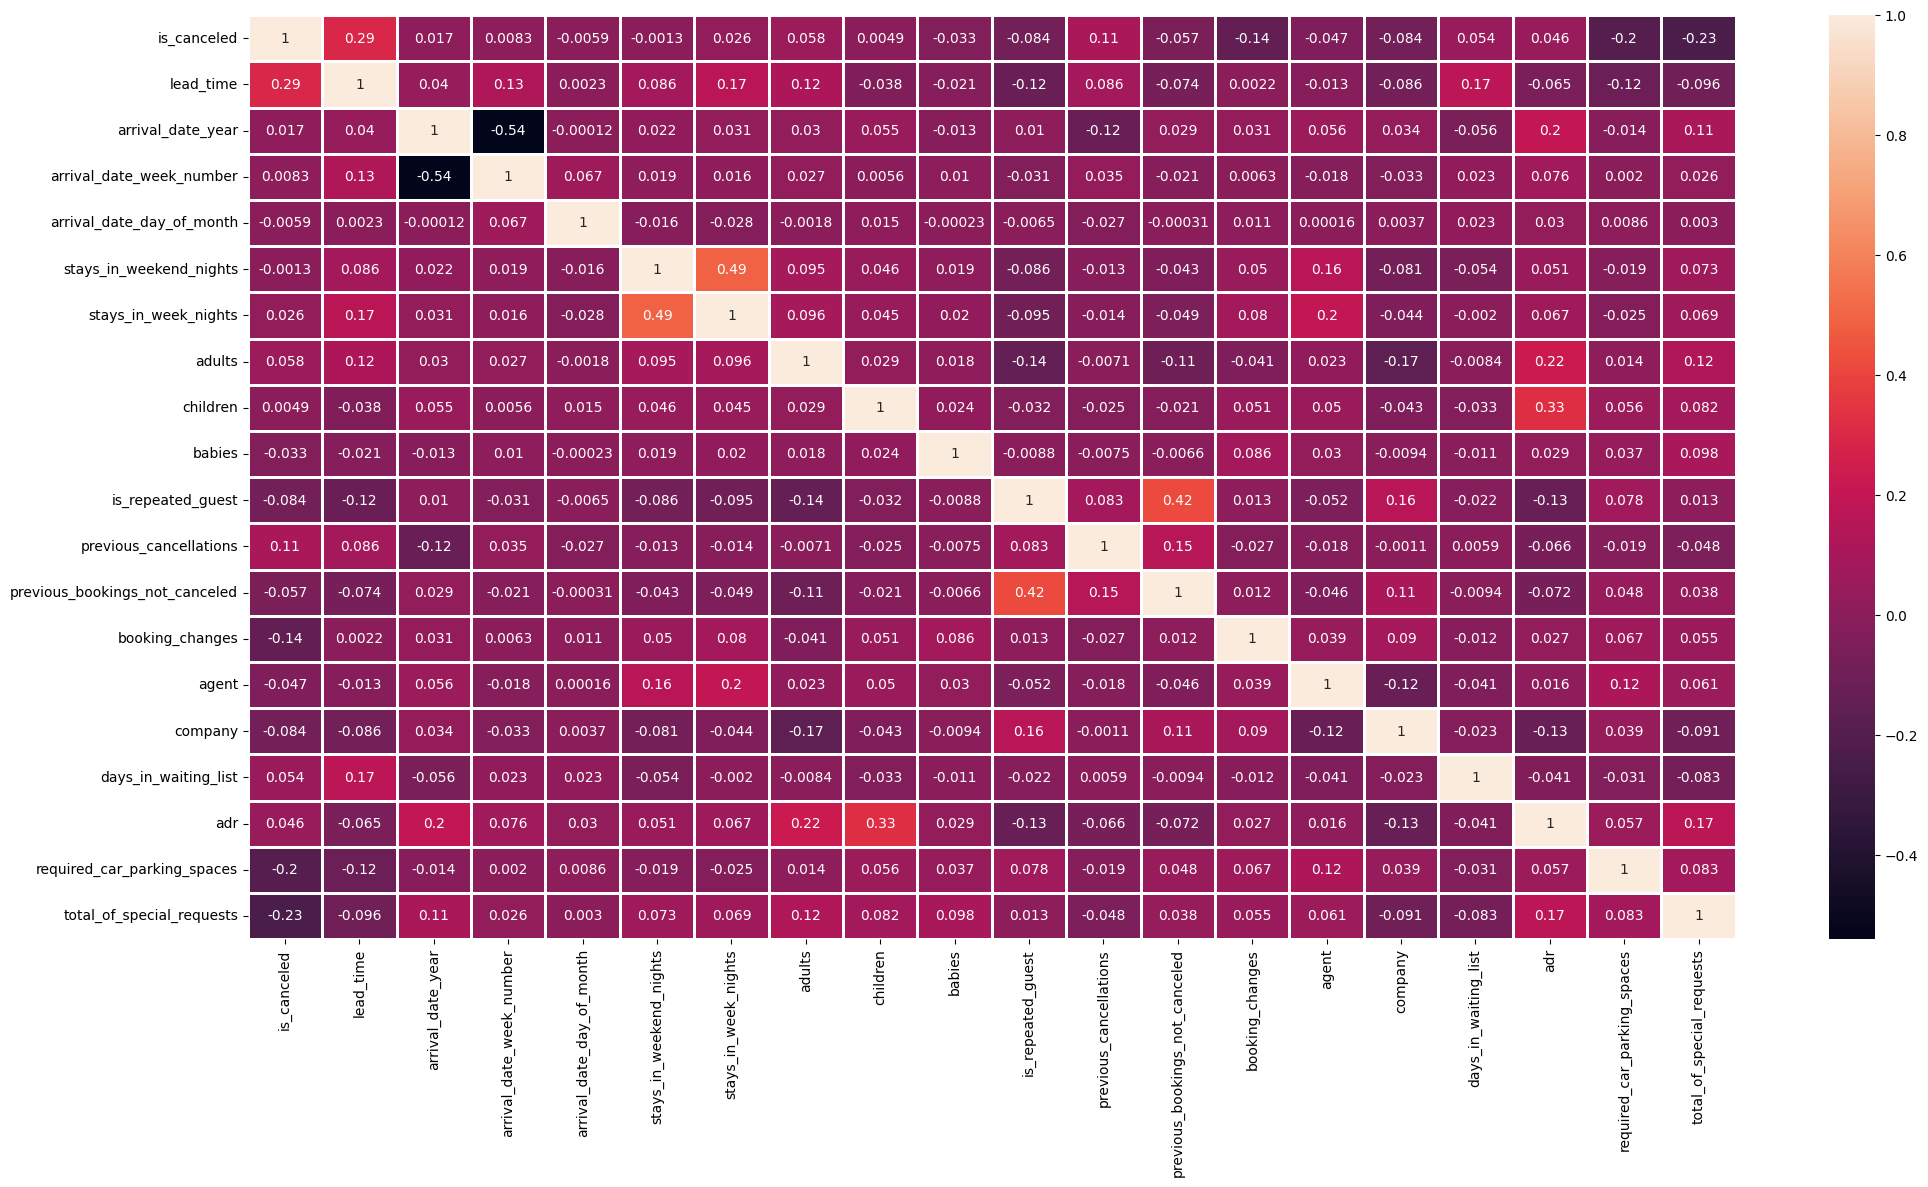

In [13]:
#Plot a heatmap of the correlation between the features of the dataset

plt.figure(figsize = (24,12))

sns.heatmap(df.corr(), annot = True , linewidths = 1)
plt.show()

In [14]:
#Correlation of cancellation status with other features

df.corr()['is_canceled'].abs().sort_values(ascending = False)

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [15]:
data = df[df['is_canceled']==0]

px.box(data_frame = data,
      x = 'reserved_room_type',
      y = 'adr',
      color = 'hotel',
      template = 'plotly_dark')

In [16]:
#Drop categorical columns that do not contribute to the classification

not_useful = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

df.drop(not_useful,axis=1,inplace=True)

In [17]:
df.shape

(119210, 26)

In [18]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'O']
categorical_columns

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [19]:
cat_df = df[categorical_columns]

Since a machine learning model cannot take categorical columns as input, we need to convert them to numerical data as follows

In [20]:
#Convert into datetime format

cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [21]:
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [23]:
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [39]:
num_df = df.drop(columns = categorical_columns, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.0,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.0,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,0.0,0.0,75.0,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,0.0,75.0,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,0.0,98.0,0,1


In [41]:
#Join the processed data columns for prediction

X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

In [42]:
X.shape,y.shape

((119210, 26), (119210,))

In [43]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)  #Split into training and testing

In [44]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((95368, 26), (23842, 26), (95368,), (23842,))

In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)                                #Fit on randomforestclassifier

RandomForestClassifier()

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

y_pred = model.predict(X_test)

In [50]:
print(f'Accuracy score: {accuracy_score(y_test,y_pred)*100}\n\n')
print(f'Confusion matrix:\n{confusion_matrix(y_test,y_pred)}\n\n')
print(f'Classification report:\n{classification_report(y_test,y_pred)}')

Accuracy score: 95.83088667058132


Confusion matrix:
[[14842    98]
 [  896  8006]]


Classification report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     14940
           1       0.99      0.90      0.94      8902

    accuracy                           0.96     23842
   macro avg       0.97      0.95      0.95     23842
weighted avg       0.96      0.96      0.96     23842

